Check the `Photo_z_quality` metric with and without depth+ebv cuts.

Running the notebook with the DESC stack.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp
import time

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf

# print MAF version
print(lsst.sims.maf.__version__)

2.9.0.sims


Set up some things

In [2]:
dbpath = '/global/cscratch1/sd/awan/dbs_wp_unzipped'
dbpath = '%s/baseline2018a.db'%dbpath
runName = 'baseline2018a'
outDir = 'mafOut'

use_nyears = [1, 3, 6, 10]   # nyears to consider
mag_cuts = {1: 24.5, 3: 25.0, 6: 25.5, 10: 26.0}  # key = year, entry is i-band limiting magnitude

nside = 128 #16

Import the new metric and set up a plotting routine

In [3]:
from photoz_quality import Photo_z_quality

In [4]:
#help(Photo_z_quality)

In [5]:
# routine to plot out the skymap
def plot_skymap(map_arr, label, title='', colorMin=0, colorMax=1):
    plt.clf()
    hp.mollview(map_arr.metricValues.filled(map_arr.slicer.badval), flip='astro',
                min=colorMin, max=colorMax,
                rot=(0,0,0) , cbar=False, title=title)
    hp.graticule(dpar=20, dmer=20, verbose=False)
    ax = plt.gca()
    im = ax.get_images()[0]
    fig= plt.gcf()
    cbaxes = fig.add_axes([0.1, 0.03, 0.8, 0.04]) # [left, bottom, width, height]
    cb = plt.colorbar(im,  orientation='horizontal',
                    format= '%.2f', cax = cbaxes) 
    cb.set_label(label, fontsize=18)
    cb.ax.tick_params(labelsize= 18)
    plt.show()

Set up MAF objects that do not change with every year we consider

In [6]:
# Connect to the database
opsdb = db.OpsimDatabase(dbpath)

# set up output directory
resultsDb = db.ResultsDb(outDir=outDir)

# Use a healpix grid to calculate values everywhere.
# This includes some dithering that will help to "smooth out" depths in a realistic way; keep the dithering
slicer = slicers.HealpixSlicer(nside=nside, latCol='randomDitherPerNightDec',
                               lonCol='randomDitherPerNightRa', latLonDeg=True, useCache=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [7]:
# set up the dustmap explicityl to allow control over the resolution
import lsst.sims.maf.maps as maps
dustMap = maps.DustMap(interp=False, nside=nside)

#########################################################################
## Running with Y1
## sql constraint: night < 365.250000 and proposalId = 3
--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilters>=3 ... 
Querying database SummaryAllProps with constraint night < 365.250000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 197494 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


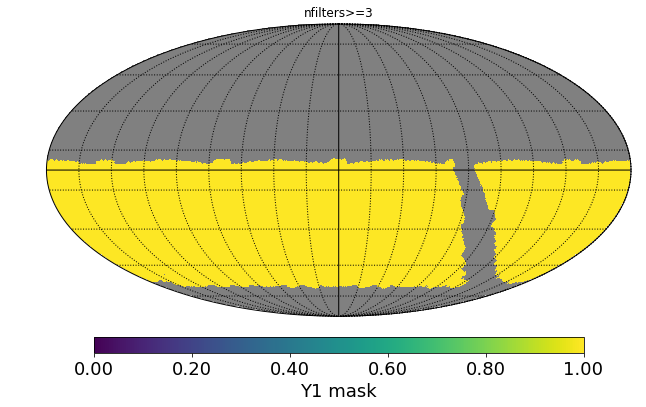

--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilter=6... 
Querying database SummaryAllProps with constraint night < 365.250000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 197494 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


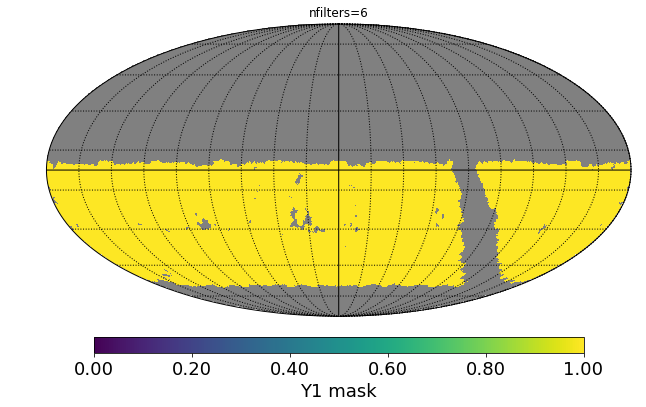

--------------------------------------------------------------------------
## Now running the analysis with ebv, depth cuts too ... 
Querying database SummaryAllProps with constraint night < 365.250000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 197494 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


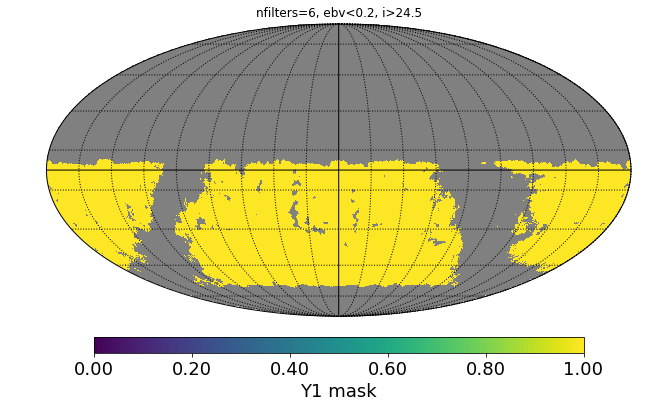

## Time taken: 1.71 min

#########################################################################
## Running with Y3
## sql constraint: night < 1095.750000 and proposalId = 3
--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilters>=3 ... 
Querying database SummaryAllProps with constraint night < 1095.750000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 605475 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


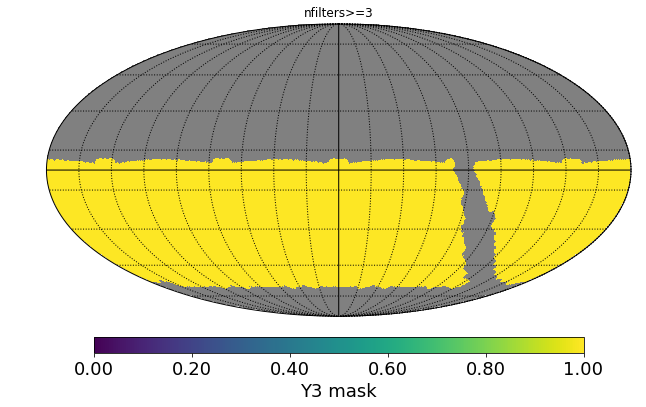

--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilter=6... 
Querying database SummaryAllProps with constraint night < 1095.750000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 605475 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


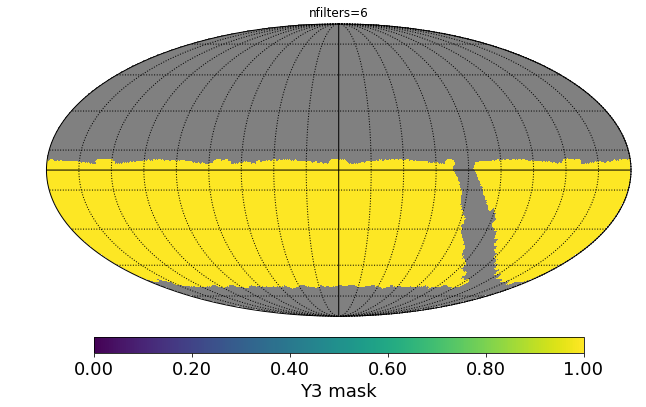

--------------------------------------------------------------------------
## Now running the analysis with ebv, depth cuts too ... 
Querying database SummaryAllProps with constraint night < 1095.750000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 605475 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


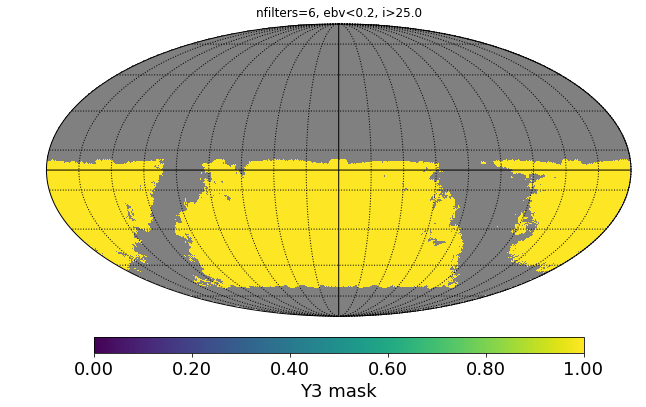

## Time taken: 2.95 min

#########################################################################
## Running with Y6
## sql constraint: night < 2191.500000 and proposalId = 3
--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilters>=3 ... 
Querying database SummaryAllProps with constraint night < 2191.500000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 1220661 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


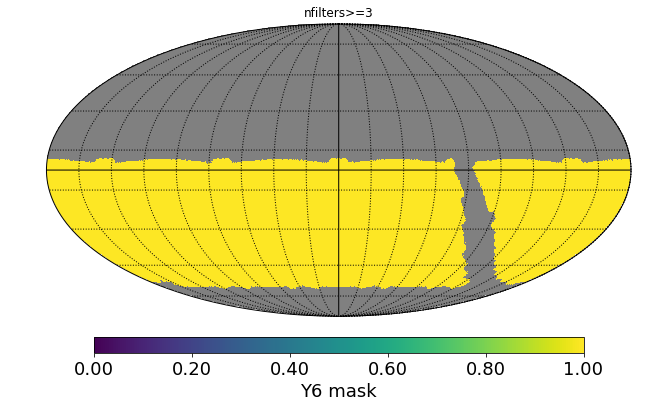

--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilter=6... 
Querying database SummaryAllProps with constraint night < 2191.500000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 1220661 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


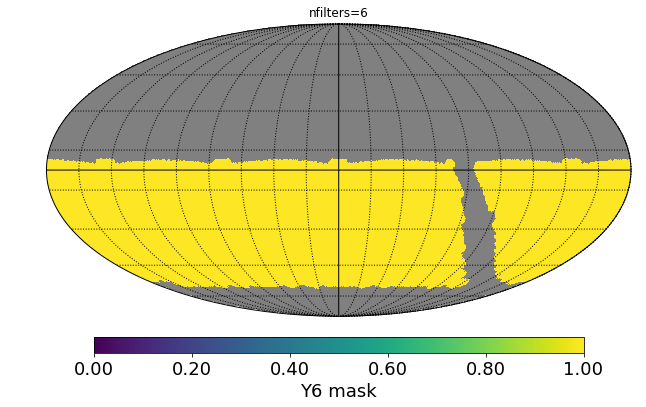

--------------------------------------------------------------------------
## Now running the analysis with ebv, depth cuts too ... 
Querying database SummaryAllProps with constraint night < 2191.500000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 1220661 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


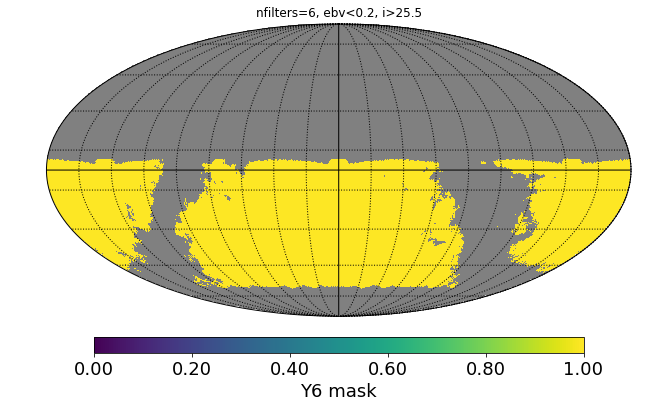

## Time taken: 6.16 min

#########################################################################
## Running with Y10
## sql constraint: night < 3652.500000 and proposalId = 3
--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilters>=3 ... 
Querying database SummaryAllProps with constraint night < 3652.500000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 2049326 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


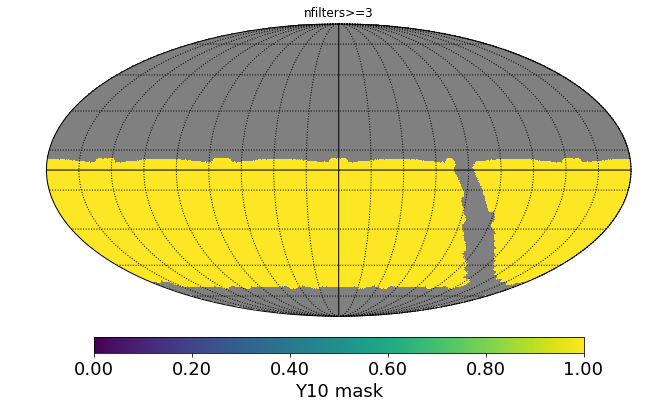

--------------------------------------------------------------------------
## Running the analysis with just the constraint on nFilters: nFilter=6... 
Querying database SummaryAllProps with constraint night < 3652.500000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 2049326 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


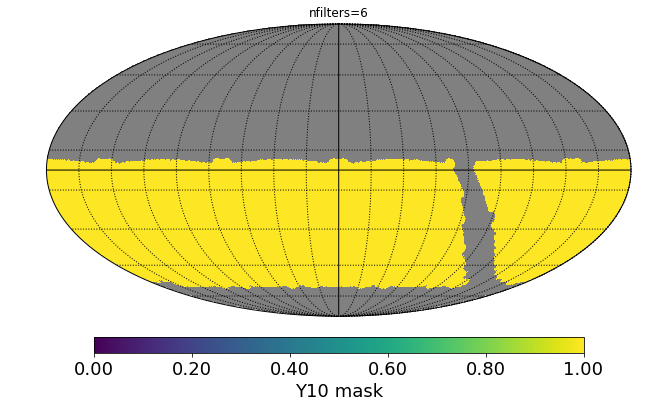

--------------------------------------------------------------------------
## Now running the analysis with ebv, depth cuts too ... 
Querying database SummaryAllProps with constraint night < 3652.500000 and proposalId = 3 for columns ['night', 'fieldRA', 'filter', 'fieldDec', 'fiveSigmaDepth']
Found 2049326 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


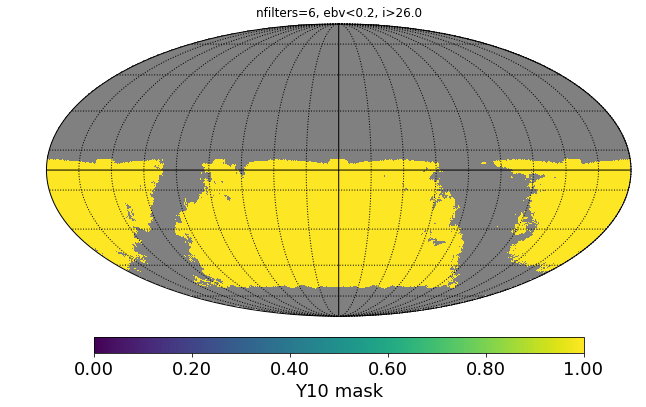

## Time taken: 11.31 min

CPU times: user 20min 34s, sys: 44.3 s, total: 21min 18s
Wall time: 22min 7s


In [8]:
%%time
for nyears in use_nyears:
    start_time = time.time()
    print('#########################################################################')
    print('## Running with Y%s'%nyears)
    yrsql = 'night < %f' % (365.25*nyears)
    # Only pull out WFD exposures? Yes. Do not want a field to be extra deep due to DDF exposures.
    propIds, propTags = opsdb.fetchPropInfo()
    wfdWhere = opsdb.createSQLWhere('WFD', propTags)
    sql = '%s and %s' % (yrsql, wfdWhere)
    print('## sql constraint: %s'%sql)
    
    # now run the metric bundle analysis with just the constraint on the number of filters
    # specified by implement_depth_ebv_cut=False 
    print('--------------------------------------------------------------------------')
    print('## Running the analysis with just the constraint on nFilters: nFilters>=3 ... ')
    metric = Photo_z_quality(implement_depth_ebv_cut=False, nfilters_limit=3)
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName, mapsList=[dustMap])
    bgroup = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    
    # plot the skymap to see whats happening
    bundle.metricValues.data[:] = 1  # fake metric data since the metric only changes the mask
    plot_skymap(bundle, label='Y%s mask'%nyears, title='nfilters>=3')

    # now run the analysis with nfilter=6
    print('--------------------------------------------------------------------------')
    print('## Running the analysis with just the constraint on nFilters: nFilter=6... ')
    metric = Photo_z_quality(implement_depth_ebv_cut=False)
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName, mapsList=[dustMap])
    bgroup = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    
    # plot the skymap to see whats happening
    bundle.metricValues.data[:] = 1  # fake metric data since the metric only changes the mask
    plot_skymap(bundle, label='Y%s mask'%nyears, title='nfilters=6')
    
    # now run the analysis with an ebv and depth cut
    print('--------------------------------------------------------------------------')
    print('## Now running the analysis with ebv, depth cuts too ... ')
    metric = Photo_z_quality(implement_depth_ebv_cut=True, i_lim_mag=mag_cuts[nyears])
    bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName, mapsList=[dustMap])
    bgroup = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    
    # plot the skymap to see whats happening
    bundle.metricValues.data[:] = 1  # fake metric data since the metric only changes the mask
    plot_skymap(bundle,  label='Y%s mask'%nyears, title='nfilters=6, ebv<0.2, i>%s'%mag_cuts[nyears])
    
    print('## Time taken: %.2f min\n'%((time.time()-start_time)/60.))